In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<BarContainer object of 2 artists>

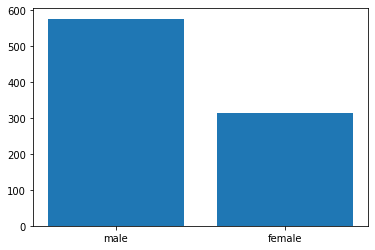

In [44]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.columns
train.describe()
test.describe()
train.info()
a=train["Cabin"].isnull().sum()
train=train.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)
test=test.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)
plt.bar(train["Sex"].unique(),train["Sex"].value_counts())

In [45]:
train["Sex"]=pd.get_dummies(train["Sex"],drop_first=True)
test["Sex"]=pd.get_dummies(test["Sex"],drop_first=True)
train.isnull().sum()
test.isnull().sum()
train["Age"].describe()
train["Age"].fillna("29",inplace=True)
test["Age"].fillna("29",inplace=True)
train["Embarked"].value_counts()
train["Embarked"].fillna("S",inplace=True)
a=train["Sex"].value_counts()


In [46]:
test["Fare"].describe()
test["Fare"].fillna("14",inplace=True)
men_lived=np.where(train["Sex"]==1,train["Survived"],0)
men_lived=sum(men_lived)

female_lived=np.where(train["Sex"]==0,train["Survived"],0)
female_lived=sum(female_lived)

men_died=sum(train["Sex"])-men_lived
female_died= len(train["Sex"])- (men_lived+men_died+female_lived)

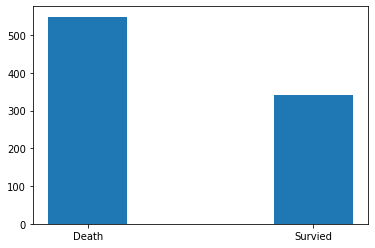

In [47]:
x=["Death","Survied"]
plt.bar(x,train["Survived"].value_counts(),width=0.35)
plt.show()

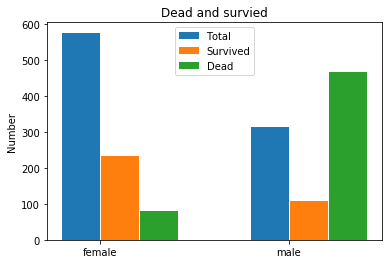

In [48]:
lived=[female_lived,men_lived]
dead=[female_died,men_died]
labels=["female","male"]
x=np.arange(len(labels))
width=0.2
plt.bar(x-width/2,train["Sex"].value_counts(),width=0.2,label="Total")
plt.bar(x+width/1.9,lived,width=0.2,label="Survived")
plt.bar(x+width/0.64,dead,width=0.2,label="dead")
plt.ylabel("Number")
plt.title("Dead and survied")
plt.xticks(x,labels)
plt.legend(["Total","Survived","Dead"])
plt.show()

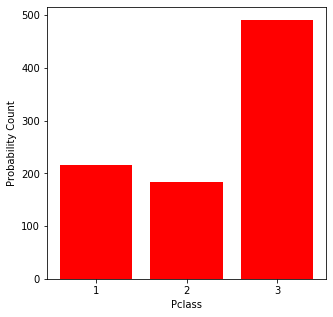

In [49]:
plt.figure(figsize=(5,5))
plt.bar(train["Pclass"].unique(),train["Pclass"].value_counts(),color="Red")
plt.xticks(train["Pclass"].unique())
plt.ylabel("Probability Count")
plt.xlabel("Pclass")
plt.show()

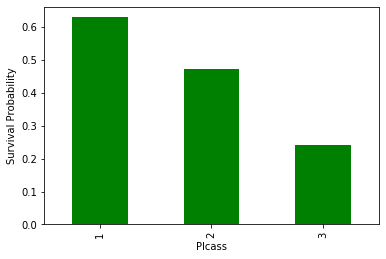

In [50]:
plt1=train[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar',color="green")
plt1.set_xlabel("Plcass")
plt1.set_ylabel("Survival Probability")
plt.show()

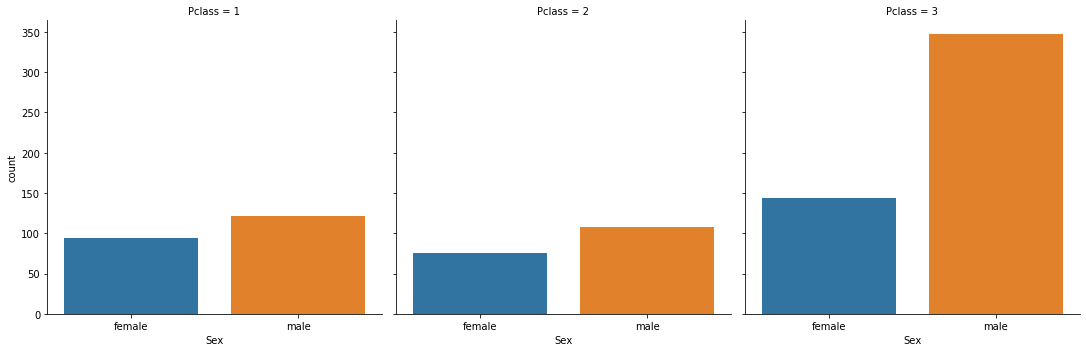

In [51]:
sns.catplot('Sex', col='Pclass',data=train, kind = 'count')
plt.xticks(x,labels)
plt.show()

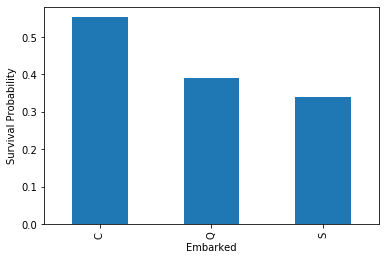

In [52]:
plt1=train[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt1.set_ylabel("Survival Probability")
plt.show()

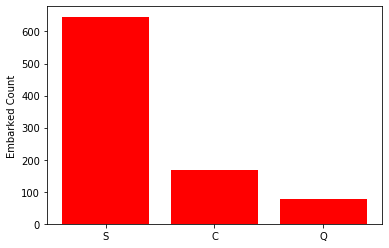

In [53]:
plt.bar(train["Embarked"].unique(),train["Embarked"].value_counts(),color="RED")
plt.ylabel("Embarked Count")
plt.show()

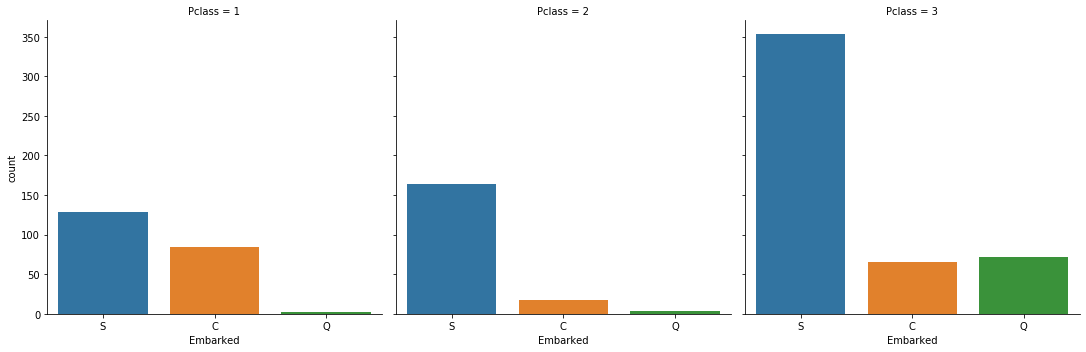

In [54]:
sns.catplot('Embarked', col='Pclass',data=train, kind = 'count')
plt.show()

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null uint8
Age         418 non-null object
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null object
Embarked    418 non-null object
dtypes: int64(3), object(3), uint8(1)
memory usage: 20.1+ KB


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null uint8
Age         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int64(4), object(2), uint8(1)
memory usage: 49.7+ KB


In [57]:
train["Age"]=train["Age"].astype(int)
test["Age"]=test["Age"].astype(int)
train["Fare"]=train["Fare"].astype(int)
test["Fare"]=test["Fare"].astype(int)
train["Embarked"]=pd.get_dummies(train["Embarked"],drop_first=True)
test["Embarked"]=pd.get_dummies(test["Embarked"],drop_first=True)

In [58]:
train["Total_number"]=train["SibSp"]+train["Parch"]+1
test["Total_number"]=test["SibSp"]+test["Parch"]+1
train["Fareperhead"]=train["Fare"]/(train["Total_number"])
test["Fareperhead"]=test["Fare"]/(test["Total_number"])
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_number,Fareperhead
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.544332,0.523008,0.381594,31.785634,0.086420,1.904602,19.595331
std,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,49.703730,0.281141,1.613459,35.832148
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.000000,0.000000,1.000000,7.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.000000,0.000000,1.000000,8.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,2.000000,23.666667
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,1.000000,11.000000,512.000000


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null uint8
Age             891 non-null int32
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null int32
Embarked        891 non-null uint8
Total_number    891 non-null int64
Fareperhead     891 non-null float64
dtypes: float64(1), int32(2), int64(5), uint8(2)
memory usage: 50.6 KB


In [60]:
train["Fareperhead"]=train["Fareperhead"].astype(int)
test["Fareperhead"]=test["Fareperhead"].astype(int)

In [61]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()

In [62]:
X_train=preprocessing.scale(X_train)
random_forest = RandomForestClassifier(n_estimators=30)
random_forest.fit(X_train, Y_train)
Y_predict = random_forest.predict(X_test)
acc_rand=random_forest.score(X_train, Y_train)
Y1_predict=random_forest.predict(X_train)
print("Confusion Matrix")
print(confusion_matrix(Y_train, Y1_predict))
print ('Accuracy Score :',accuracy_score(Y_train, Y1_predict) )
print ('Report : ')
print (classification_report(Y_train, Y1_predict) )

Confusion Matrix
[[537  12]
 [ 29 313]]
Accuracy Score : 0.9539842873176206
Report : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       549
           1       0.96      0.92      0.94       342

    accuracy                           0.95       891
   macro avg       0.96      0.95      0.95       891
weighted avg       0.95      0.95      0.95       891



In [63]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log=logreg.score(X_train, Y_train)
Y1_predict=logreg.predict(X_train)
print("Confusion Matrix")
print(confusion_matrix(Y_train, Y1_predict))
print ('Accuracy Score :',accuracy_score(Y_train, Y1_predict) )
print ('Report : ')
print (classification_report(Y_train, Y1_predict) )

Confusion Matrix
[[465  84]
 [ 98 244]]
Accuracy Score : 0.7957351290684624
Report : 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.74      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.80      0.79       891



In [64]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_dec=decision_tree.score(X_train, Y_train)
Y1_predict=decision_tree.predict(X_train)
print("Confusion Matrix")
print(confusion_matrix(Y_train, Y1_predict))
print ('Accuracy Score :',accuracy_score(Y_train, Y1_predict) )
print ('Report : ')
print (classification_report(Y_train, Y1_predict) )

Confusion Matrix
[[545   4]
 [ 34 308]]
Accuracy Score : 0.957351290684624
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       549
           1       0.99      0.90      0.94       342

    accuracy                           0.96       891
   macro avg       0.96      0.95      0.95       891
weighted avg       0.96      0.96      0.96       891



In [65]:
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)  
acc_knn=classifier.score(X_train, Y_train)
Y1_predict=classifier.predict(X_train)
print("Confusion Matrix")
print(confusion_matrix(Y_train, Y1_predict))
print ('Accuracy Score :',accuracy_score(Y_train, Y1_predict) )
print ('Report : ')
print (classification_report(Y_train, Y1_predict) )

Confusion Matrix
[[530  19]
 [ 21 321]]
Accuracy Score : 0.9551066217732884
Report : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       549
           1       0.94      0.94      0.94       342

    accuracy                           0.96       891
   macro avg       0.95      0.95      0.95       891
weighted avg       0.96      0.96      0.96       891



In [66]:
linear_svc=LinearSVC(max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_svm=linear_svc.score(X_train, Y_train)
Y1_predict=linear_svc.predict(X_train)
print("Confusion Matrix")
print(confusion_matrix(Y_train, Y1_predict))
print ('Accuracy Score :',accuracy_score(Y_train, Y1_predict) )
print ('Report : ')
print (classification_report(Y_train, Y1_predict) )

Confusion Matrix
[[477  72]
 [105 237]]
Accuracy Score : 0.8013468013468014
Report : 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.69      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



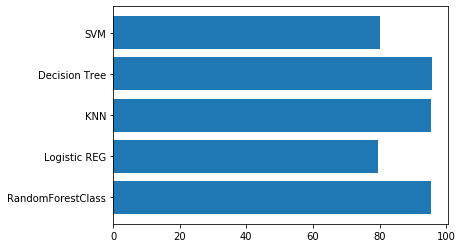

In [68]:
model=["RandomForestClass","Logistic REG","KNN","Decision Tree","SVM"]
Acc=[acc_rand*100,acc_log*100,acc_knn*100,acc_dec*100,acc_svm*100]
plt.barh(model,Acc)
plt.show()
